add libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

load data

In [5]:
df = pd.read_csv('/workspaces/bakery_prediction/2_BaselineModel/split_data/train_data.csv')
df.head()

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien,sunny,cloudy,rainy,thunderstorm
0,1307011,2013-07-01,1,148.828353,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
1,1307012,2013-07-01,2,535.856285,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
2,1307013,2013-07-01,3,201.198426,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
3,1307014,2013-07-01,4,65.890169,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0
4,1307015,2013-07-01,5,317.475875,0,6,17.8375,15,27,7,1,0,3,0,0,1,0,0


scatter blots

<Figure size 640x480 with 0 Axes>

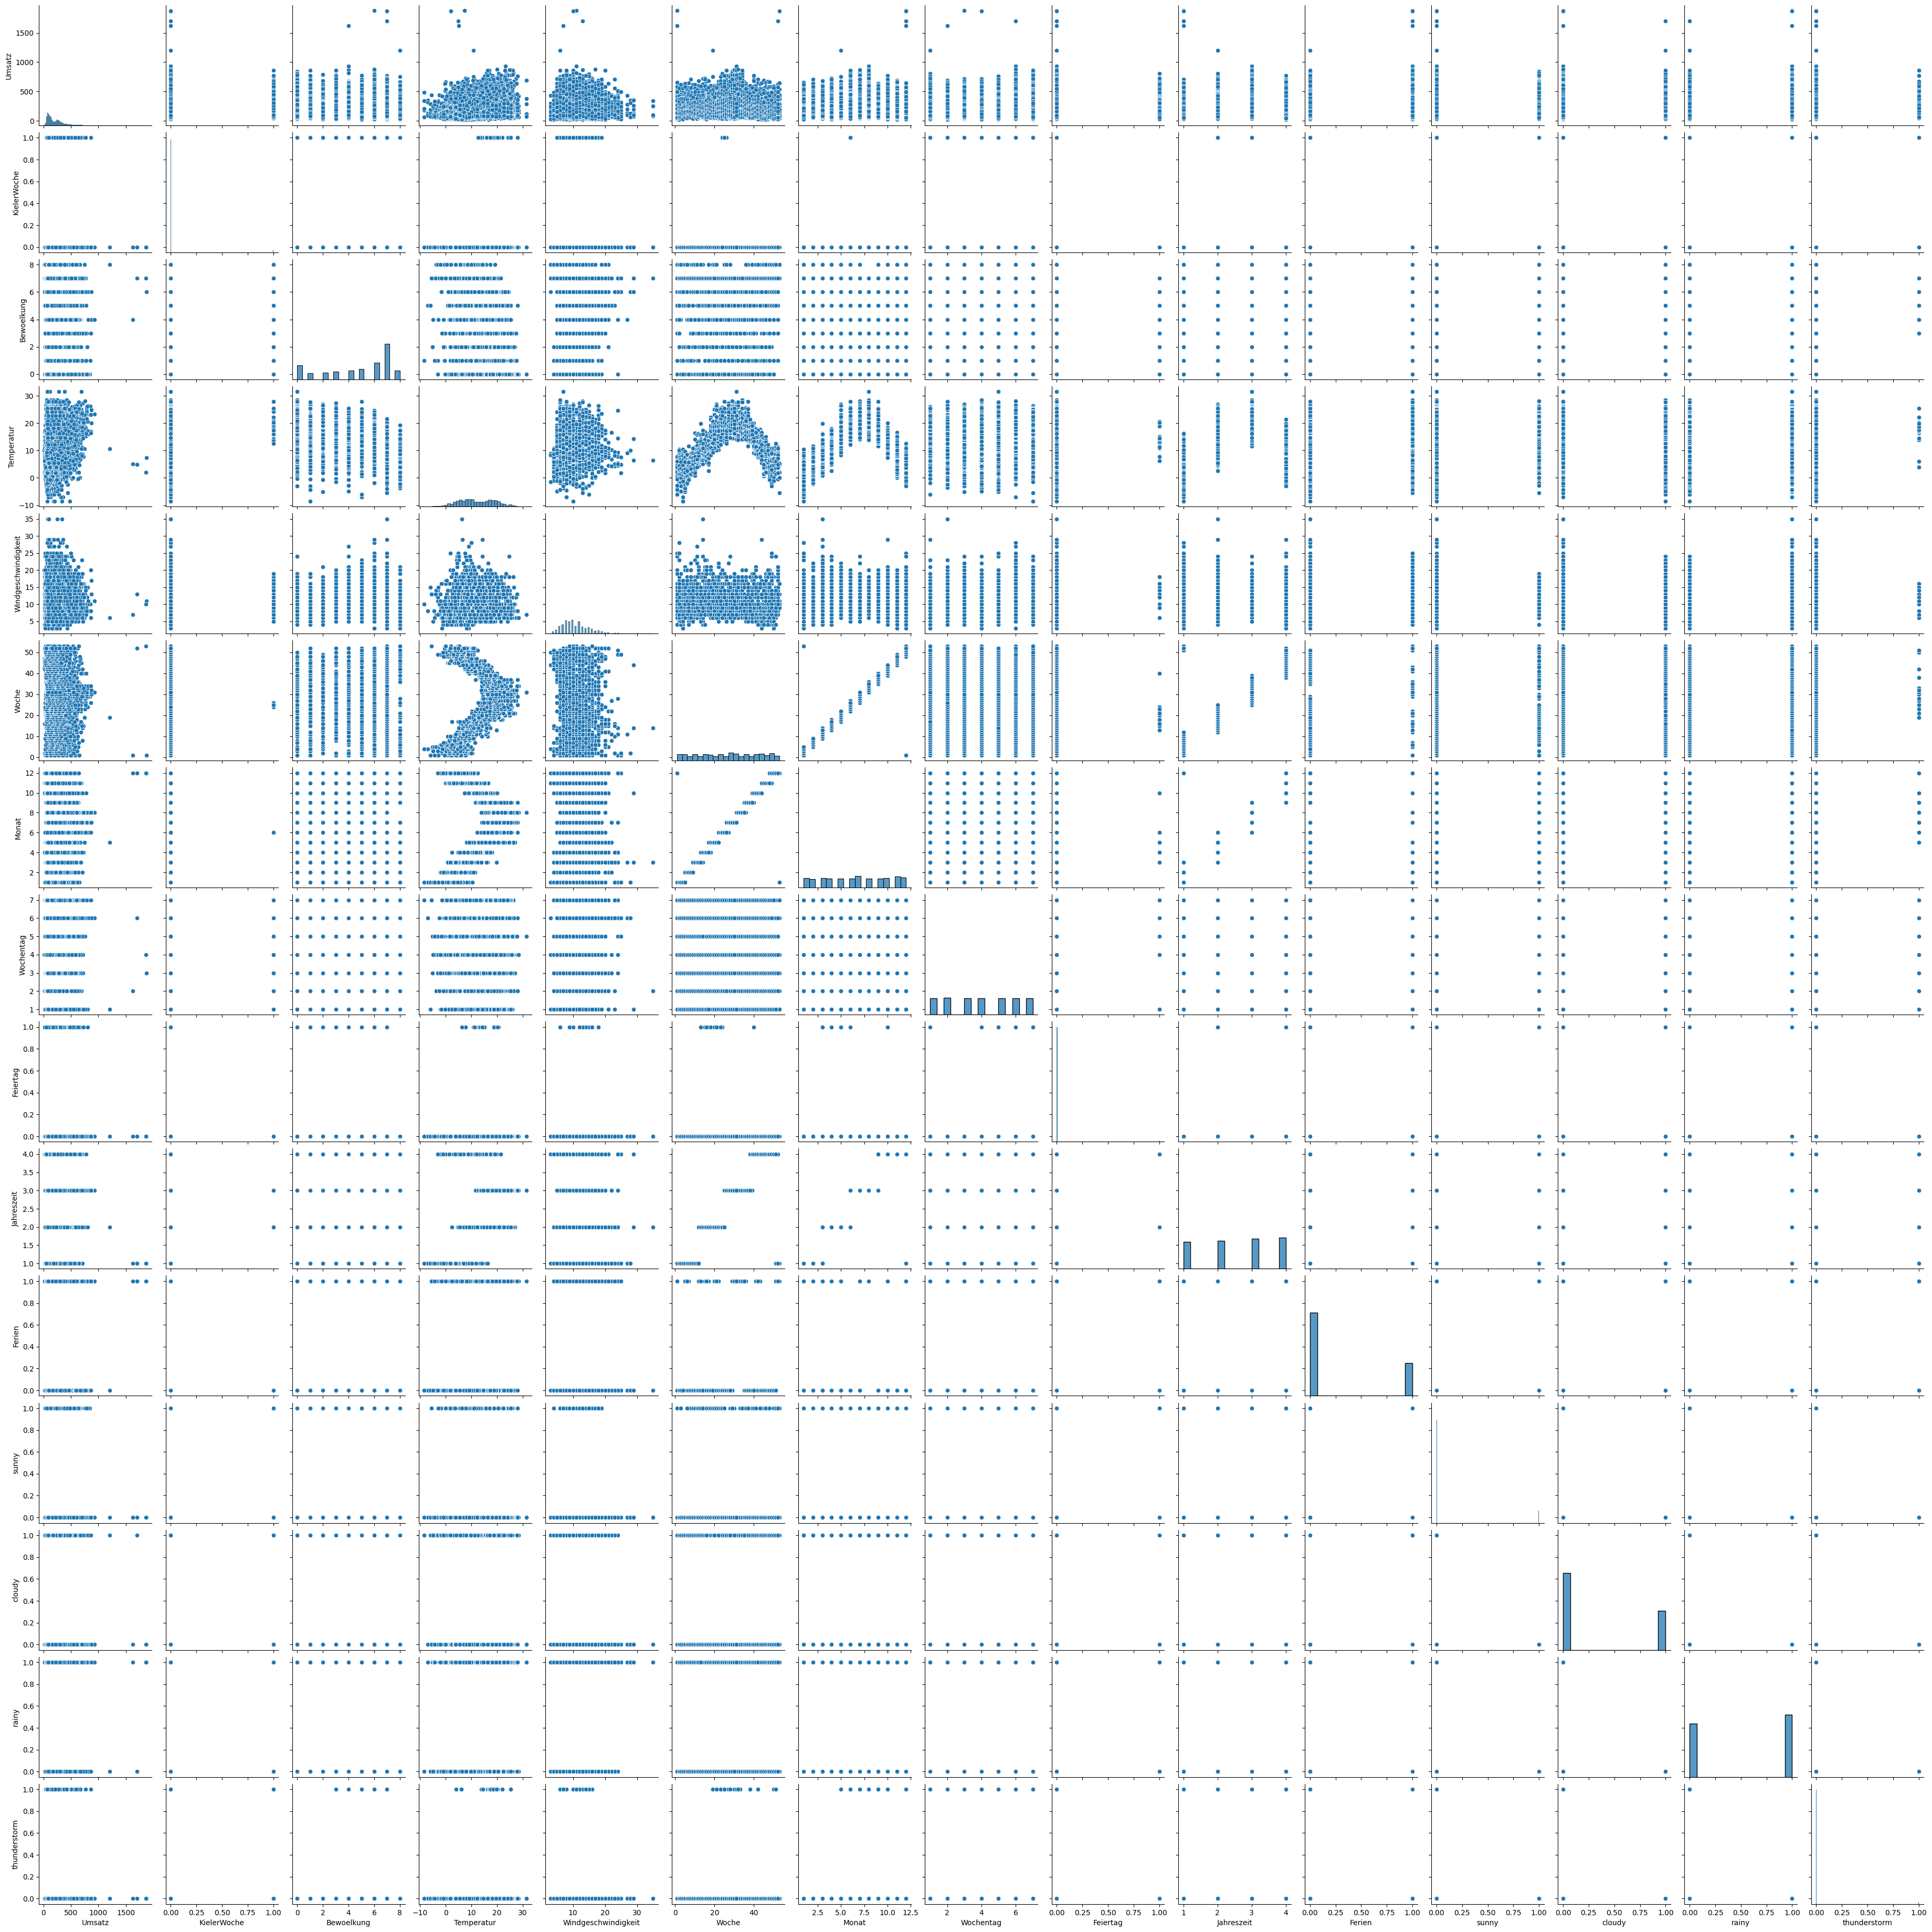

In [16]:
# define a list of numerical features
numerical_features = ['Umsatz', 'KielerWoche', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 
                      'Woche', 'Monat', 'Wochentag', 'Feiertag', 'Jahreszeit', 'Ferien', 'sunny', 
                      'cloudy', 'rainy', 'thunderstorm']

# create a pairplot, with the df with only numerical features selected
plt.figure()
axes = sns.pairplot(df[numerical_features])

correlation check

In [17]:
df[numerical_features].corr()

,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien,sunny,cloudy,rainy,thunderstorm
Umsatz,1.000000,0.053619,-0.085912,0.216493,0.011477,0.001017,0.015637,0.134691,0.047734,0.016861,0.161020,0.011844,-0.025471,0.010692,0.025015
KielerWoche,0.053619,1.000000,0.002325,0.145778,0.001032,-0.019269,-0.029506,0.043155,-0.016709,0.014664,-0.097921,0.002208,-0.037048,0.003273,0.125229
Bewoelkung,-0.085912,0.002325,1.000000,-0.376563,0.043300,0.018603,0.014753,-0.010421,-0.065129,-0.012279,-0.019757,-0.230590,-0.010078,0.147568,0.022901
Temperatur,0.216493,0.145778,-0.376563,1.000000,0.003135,0.218965,0.221654,0.021381,0.023979,0.297911,0.194750,0.084821,-0.161472,0.078491,0.089681
Windgeschwindigkeit,0.011477,0.001032,0.043300,0.003135,1.000000,-0.108922,-0.115052,0.002965,0.020486,-0.139483,0.040594,-0.045551,-0.056215,0.075507,0.025349
Woche,0.001017,-0.019269,0.018603,0.218965,-0.108922,1.000000,0.972987,-0.006223,-0.022315,0.869609,0.005874,-0.015137,-0.057711,0.056969,0.029532
Monat,0.015637,-0.029506,0.014753,0.221654,-0.115052,0.972987,1.000000,-0.004540,-0.020261,0.864699,0.000559,-0.020635,-0.055681,0.058391,0.029849
Wochentag,0.134691,0.043155,-0.010421,0.021381,0.002965,-0.006223,-0.004540,1.000000,-0.065520,0.004952,-0.058849,-0.012947,-0.002406,0.015947,-0.023016
Feiertag,0.047734,-0.016709,-0.065129,0.023979,0.020486,-0.022315,-0.020261,-0.065520,1.000000,-0.008924,0.044704,0.043948,-0.009714,-0.014941,-0.013195
Jahreszeit,0.016861,0.014664,-0.012279,0.297911,-0.139483,0.869609,0.864699,0.004952,-0.008924,1.000000,-0.066021,-0.029255,-0.028343,0.038411,0.027464


linear regression with temperature

In [6]:
# define the dependent variable
Y = df["Umsatz"]

# define the DataFrame with the independent variable and the constant term
X = sm.add_constant(df["Temperatur"])

# create the model
model = sm.OLS(Y, X)

# fit the model
results = model.fit()

# print the summary of the regression results
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     368.4
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           3.50e-80
Time:                        12:48:41   Log-Likelihood:                -47884.
No. Observations:                7493   AIC:                         9.577e+04
Df Residuals:                    7491   BIC:                         9.579e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.3365      3.315     46.554      0.0

Interpreting the model

<Axes: xlabel='Temperatur', ylabel='Umsatz'>

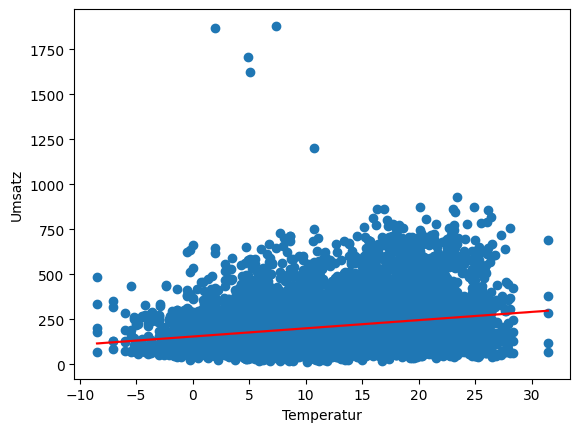

In [7]:
# get the parameter values from the model
m = results.params["Temperatur"]
b = results.params["const"]

# create the scatter plot
plt.scatter(df['Temperatur'], df['Umsatz'])

# calculate the line of best fit
line = m * df["Temperatur"] + b

# assign "price" as the y-label
plt.ylabel("Umsatz")

# add the line of best fit to the scatter plot
sns.lineplot(x=df["Temperatur"], y=line, color="red")

add another variable "Ferien"

In [15]:
predictors = ["Temperatur", "Windgeschwindigkeit", "Woche"]
Y = df["Umsatz"]
X = sm.add_constant(df[predictors])
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     129.1
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           1.62e-81
Time:                        13:01:20   Log-Likelihood:                -47875.
No. Observations:                7493   AIC:                         9.576e+04
Df Residuals:                    7489   BIC:                         9.579e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 162.2687    

validation (errors!)

In [22]:
validation_data = "/workspaces/bakery_prediction/2_BaselineModel/split_data/val_data.csv"
Umsatz1 = validation_data.loc[1]

AttributeError: 'str' object has no attribute 'loc'